### Попов А.В. ИУ5-61Б Вариант12

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
%matplotlib inline
sns.set(style="ticks")

In [39]:
data = pd.read_csv('heart.csv', sep=",")
df = data

In [40]:
data.shape

(1025, 14)

In [41]:
# shape and data types of the data
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [42]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Создание категориального признака
В данном датасете нет категориального признака, поэтому самостоятельно добавим его по полю cp: 0 = girdling; 1 = compressive; 2 = local; 3 = acute

In [43]:
# Определите условия для каждой категории
conditions = [
    data['cp'] == 0, # girdling
    data['cp'] == 1, # compressive
    data['cp'] == 2, # local
    data['cp'] == 3 # acute
]

# Определите соответствующие категории
choices = ['girdling', 'compressive', 'local', 'acute']

# Примените условия к датафрейму
data['cp_category'] = np.select(conditions, choices, default='unknown')

In [44]:
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,girdling
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,girdling
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,girdling
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,girdling
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,girdling
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,girdling
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,girdling
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0,girdling
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,girdling
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0,girdling


###  Замена на пропуски часть значений категориального признака
В данном датасете нет пропусков вообще, поэтому самостоятельно добавим их в категориальное поле

In [45]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

age - 0
sex - 0
cp - 0
trestbps - 0
chol - 0
fbs - 0
restecg - 0
thalach - 0
exang - 0
oldpeak - 0
slope - 0
ca - 0
thal - 0
target - 0
cp_category - 0


In [46]:
# Количество пропусков, которые будут добавлены в категориальном признаке
n_nan = 156

# Выбираем случайные индексы для добавления пропусков в категориальном признаке
index_nan = np.random.choice(data['cp_category'].size, n_nan, replace=False)

# Добавляем пропуски в поле cp_category
data['cp_category'].iloc[index_nan] = np.nan

In [47]:
# Количество пропусков, которые будут добавлены в количественном признаке
n_nan = 228

# Выбираем случайные индексы для добавления пропусков в количественном признаке
index_nan = np.random.choice(data['chol'].size, n_nan, replace=False)

# Добавляем пропуски в поле chol
data['chol'].iloc[index_nan] = np.nan

In [48]:
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,girdling
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,girdling
2,70,1,0,145,NaN,0,1,125,1,2.6,0,0,3,0,girdling
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,girdling
4,62,0,0,138,NaN,1,1,106,0,1.9,1,3,2,0,girdling
5,58,0,0,100,248.0,0,0,122,0,1.0,1,0,2,1,girdling
6,58,1,0,114,NaN,0,2,140,0,4.4,0,3,1,0,girdling
7,55,1,0,160,289.0,0,0,145,1,0.8,1,1,3,0,girdling
8,46,1,0,120,249.0,0,0,144,0,0.8,2,0,3,0,NaN
9,54,1,0,122,NaN,0,0,116,1,3.2,1,2,2,0,NaN


 ## Обработка пропусков в данных для категориального признака cp_category
 Будет выполняться за счёт метода "Внедрение значений" - *импьютация* со стратегией "most_frequent"

In [49]:
# Импьютация наиболее частыми значениями
from sklearn.impute import SimpleImputer# Фильтр для проверки заполнения пустых значений
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(data[['cp_category']])
data_imp[0:30]

array([['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['compressive'],
       ['girdling'],
       ['girdling'],
       ['compressive'],
       ['local'],
       ['girdling'],
       ['compressive'],
       ['local'],
       ['local'],
       ['girdling'],
       ['girdling'],
       ['girdling'],
       ['local'],
       ['girdling'],
       ['local'],
       ['compressive'],
       ['local'],
       ['girdling']], dtype=object)

In [50]:
data[['cp_category']] = data_imp
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,girdling
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,girdling
2,70,1,0,145,NaN,0,1,125,1,2.6,0,0,3,0,girdling
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,girdling
4,62,0,0,138,NaN,1,1,106,0,1.9,1,3,2,0,girdling
5,58,0,0,100,248.0,0,0,122,0,1.0,1,0,2,1,girdling
6,58,1,0,114,NaN,0,2,140,0,4.4,0,3,1,0,girdling
7,55,1,0,160,289.0,0,0,145,1,0.8,1,1,3,0,girdling
8,46,1,0,120,249.0,0,0,144,0,0.8,2,0,3,0,girdling
9,54,1,0,122,NaN,0,0,116,1,3.2,1,2,2,0,girdling


## Обработка пропусков в данных для количественного признака chol
 Будет выполняться за счёт метода "Внедрение значений" - *импьютация* со стратегий "median"

In [51]:
# Импьютация медианой
from sklearn.impute import SimpleImputer# Фильтр для проверки заполнения пустых значений
imp2 = SimpleImputer(missing_values=np.nan, strategy='median')
data_imp = imp2.fit_transform(data[['chol']])
data_imp[0:30]

array([[212.],
       [203.],
       [240.],
       [203.],
       [240.],
       [248.],
       [240.],
       [289.],
       [249.],
       [240.],
       [149.],
       [341.],
       [210.],
       [298.],
       [240.],
       [210.],
       [308.],
       [266.],
       [244.],
       [211.],
       [185.],
       [223.],
       [208.],
       [240.],
       [209.],
       [307.],
       [233.],
       [319.],
       [256.],
       [240.]])

In [52]:
data[['chol']] = data_imp
data.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_category
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0,girdling
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0,girdling
2,70,1,0,145,240.0,0,1,125,1,2.6,0,0,3,0,girdling
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0,girdling
4,62,0,0,138,240.0,1,1,106,0,1.9,1,3,2,0,girdling
5,58,0,0,100,248.0,0,0,122,0,1.0,1,0,2,1,girdling
6,58,1,0,114,240.0,0,2,140,0,4.4,0,3,1,0,girdling
7,55,1,0,160,289.0,0,0,145,1,0.8,1,1,3,0,girdling
8,46,1,0,120,249.0,0,0,144,0,0.8,2,0,3,0,girdling
9,54,1,0,122,240.0,0,0,116,1,3.2,1,2,2,0,girdling


### Диаграмма рассеяния

<Axes: xlabel='age', ylabel='trestbps'>

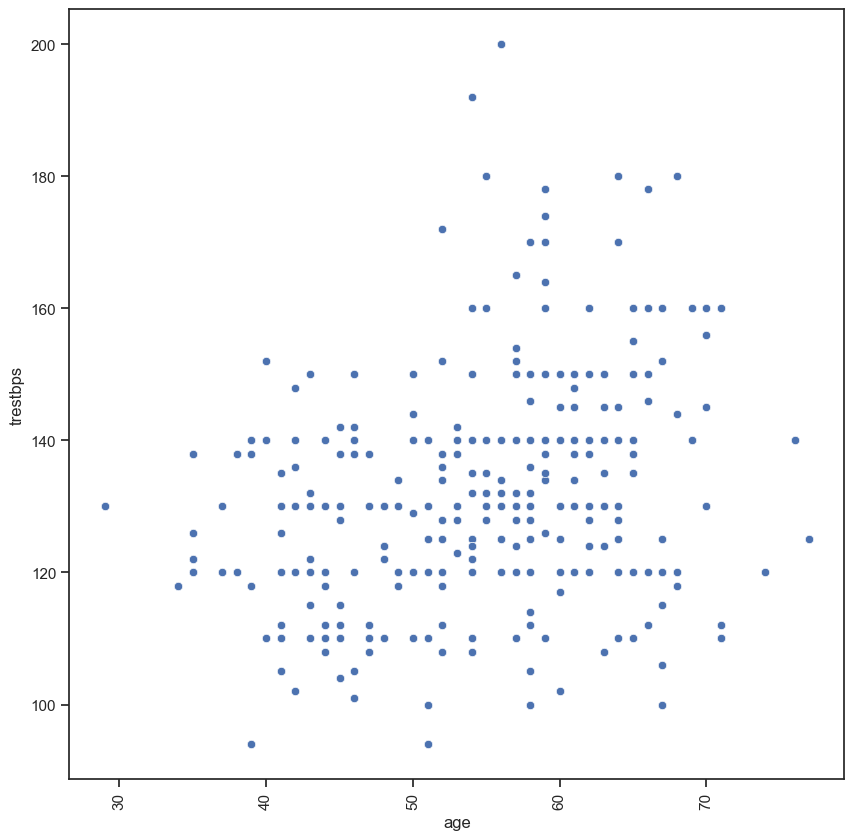

In [53]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.xticks(rotation=90)
sns.scatterplot(ax=ax, x='age', y='trestbps', data=df)